In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore")


# Load the dataset
data = pd.read_csv('/Users/venkat-a/Downloads/t2/term-deposit-marketing-2020.csv')
# Display the first few rows of the dataset for an overview
data.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [18]:

# Analyzing the distribution of numeric variables
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign']
data[numeric_cols].describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


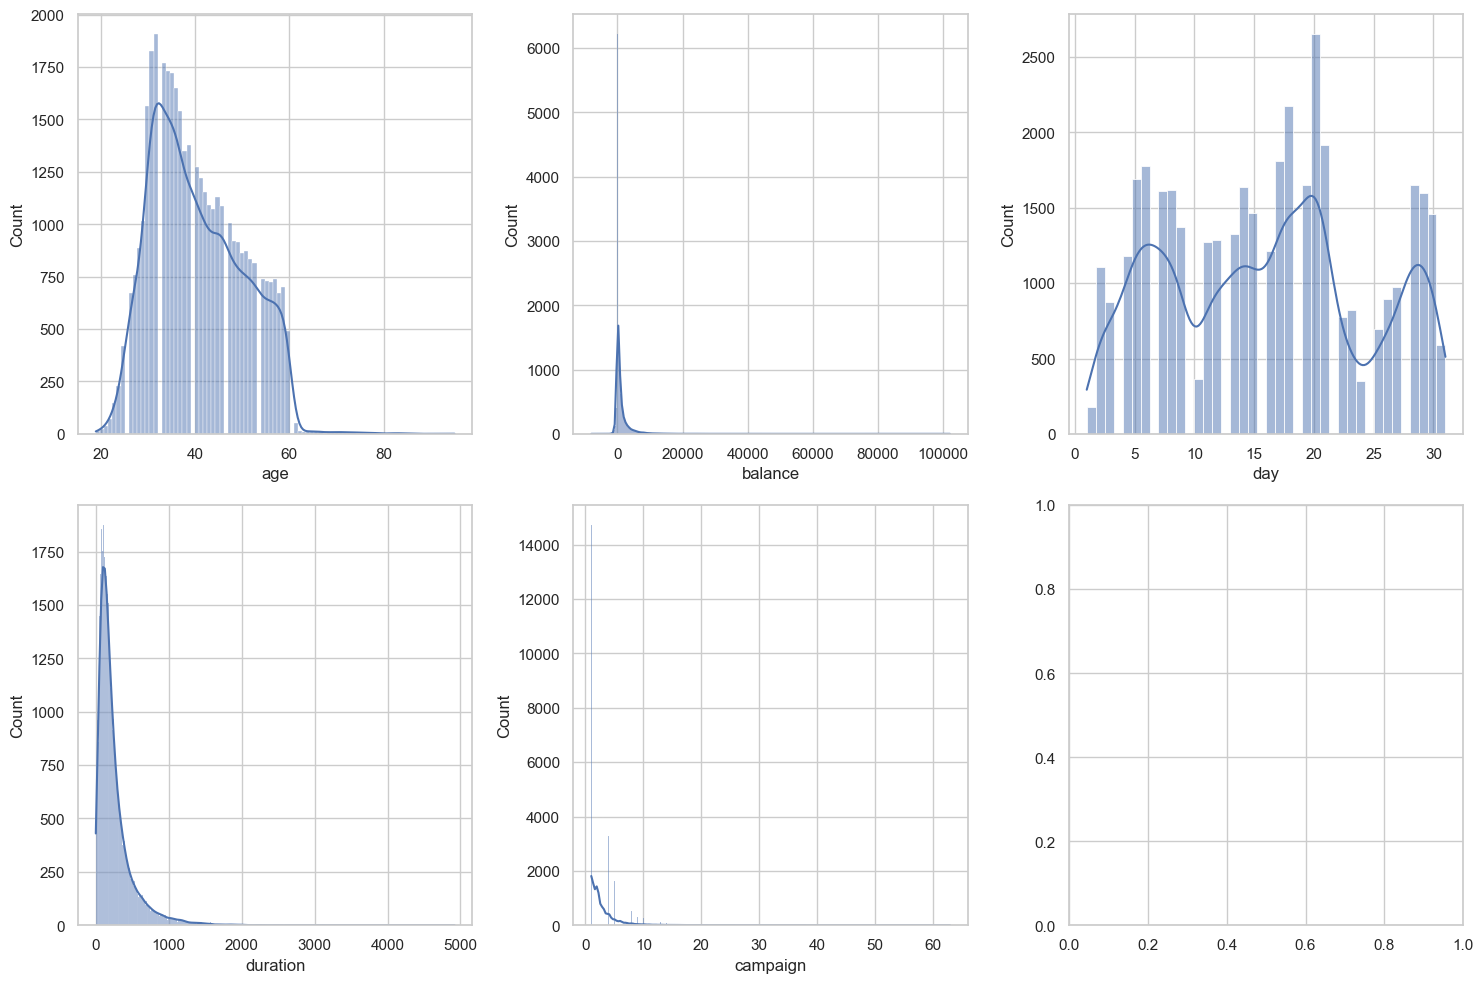

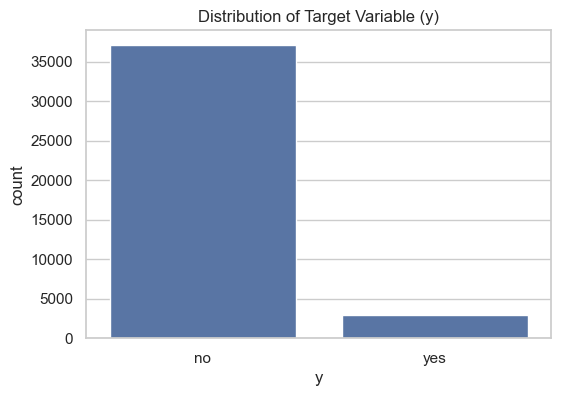

y
no     0.9276
yes    0.0724
Name: proportion, dtype: float64

In [19]:
#Setting the aesthetics for plots
sns.set(style="whitegrid")
# Checking the balance of the target variable 'y'
target_balance = data['y'].value_counts(normalize=True)

# Plotting distributions of numeric variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], ax=axs[i//3, i%3], kde=True)

# Adjusting the layout
plt.tight_layout()

# Plotting the balance of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=data)
plt.title('Distribution of Target Variable (y)')

# Showing the plots
plt.show()

target_balance

In [42]:


# Encode categorical variables
label_encoders = {}
for column in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Splitting the data into features (X) and target variable (y)
X = data.drop('y', axis=1)
y = data['y']
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numeric features
scaler = StandardScaler()
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])



In [43]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Average performance score
average_cv_score = np.mean(cv_scores)

print ('average CV score', average_cv_score)

average CV score 0.9338124999999999


In [44]:

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Perform 5-fold cross-validation on the training data set
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
average_cv_score = np.mean(cv_scores)

# Predict on the test set and calculate accuracy
y_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Extract and sort feature importances
feature_importances = rf_classifier.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)


print('Average CV score:', average_cv_score)
print('Test Accuracy:', test_accuracy)



Average CV score: 0.9338124999999999
Test Accuracy: 0.935875


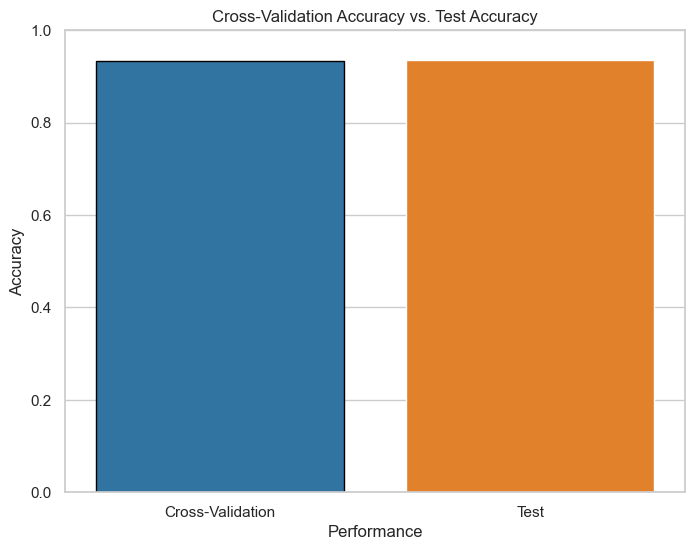

In [45]:


# Define the colors for cross-validation and test accuracy bars
colors = ['#1f77b4', '#ff7f0e']

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Cross-Validation', 'Test'], y=[average_cv_score, test_accuracy], palette=colors)

# Add a separating line between bars
for i, p in enumerate(ax.patches):
    if i % 2 == 0:
        p.set_edgecolor('#000000')  # Set the separating line color for CV accuracy

# Customize the plot
plt.title('Cross-Validation Accuracy vs. Test Accuracy')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Performance')

# Show the plot
plt.show()


Feature Importance
      Feature  Importance
11   duration    0.376545
5     balance    0.122527
0         age    0.109928
9         day    0.103617
10      month    0.073268
1         job    0.055845
12   campaign    0.045615
3   education    0.031443
2     marital    0.024226
8     contact    0.017012
6     housing    0.016252
7        loan    0.011549
13    Cluster    0.010247
4     default    0.001928


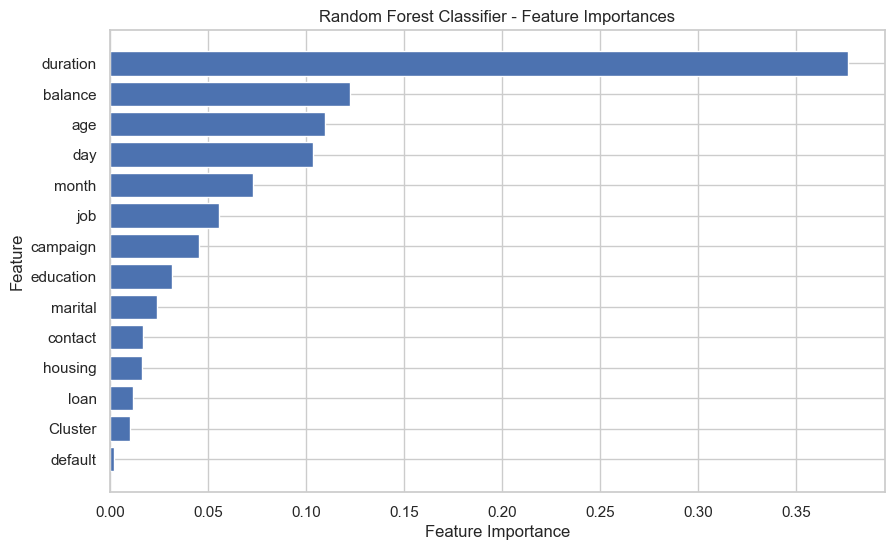

In [46]:
# Print feature importances
print('Feature Importance')
print(features_df)
# Draw plots for feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Classifier - Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important features at the top
plt.show()

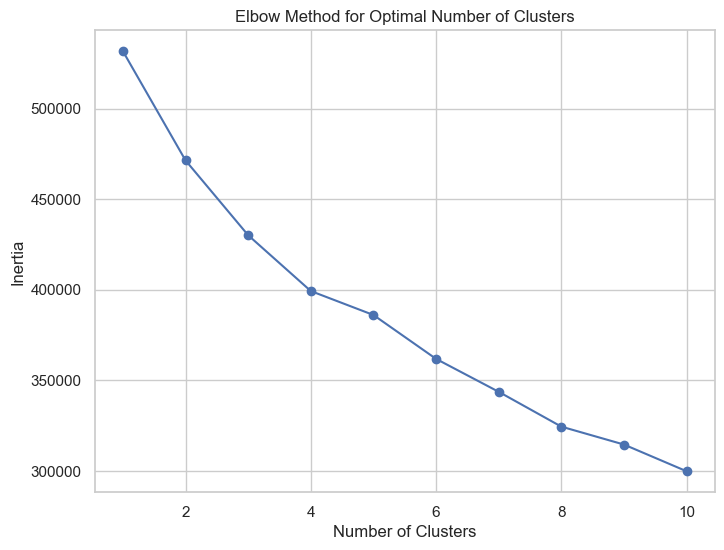

In [47]:

# Doing Cluster Analysis using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method results to decide on the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()



In [48]:
# clusters with higher investment propensity
# These clusters represent the segments of customers your client should prioritize.
# Based on the Elbow method, choose an appropriate number of clusters (e.g., 3)
n_clusters = 3

# Performing K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to your original dataset
data['Cluster'] = clusters

# Analyze the clusters to determine which ones to prioritize
cluster_centers = kmeans.cluster_centers_

# Calculate the mean feature values for each cluster
cluster_means = data.groupby('Cluster').mean()

# Sort the clusters by a relevant metric (e.g., average investment propensity)
cluster_means['Investment_Propensity'] = cluster_means['y']  # Replace 'y' with the actual investment propensity column
cluster_means.sort_values(by='Investment_Propensity', ascending=False, inplace=True)

# Print the cluster means to analyze which clusters to prioritize
print(cluster_means)


               age       job   marital  education  default      balance  \
Cluster                                                                   
1        41.221861  5.024074  1.171430   1.356153      0.0  1316.187803   
2        39.547590  4.152040  1.134734   1.165637      1.0  -141.856613   
0        40.033792  3.656911  1.140800   1.074832      0.0  1293.251223   

          housing      loan   contact        day     month    duration  \
Cluster                                                                  
1        0.343089  0.179360  0.080324  17.225113  3.078156  253.563466   
2        0.535229  0.370828  0.740420  16.379481  5.786156  239.304079   
0        0.811744  0.160927  1.193057  15.026267  7.466670  256.424199   

         campaign         y  Investment_Propensity  
Cluster                                             
1        3.276228  0.090992               0.090992  
2        3.155748  0.060569               0.060569  
0        2.553088  0.057797              

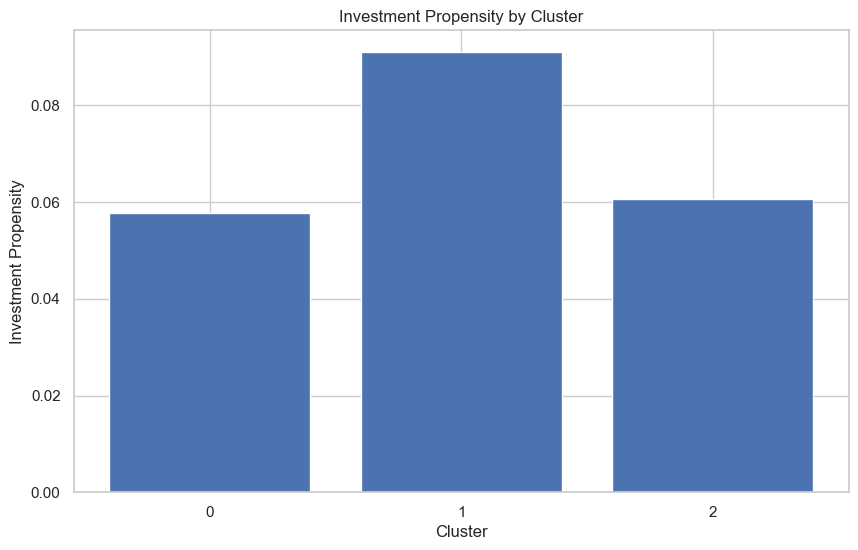

In [49]:

# Plotting the cluster means for investment propensity
plt.figure(figsize=(10, 6))
plt.bar(cluster_means.index, cluster_means['Investment_Propensity'])
plt.xlabel('Cluster')
plt.ylabel('Investment Propensity')
plt.title('Investment Propensity by Cluster')
plt.xticks(cluster_means.index)
plt.show()


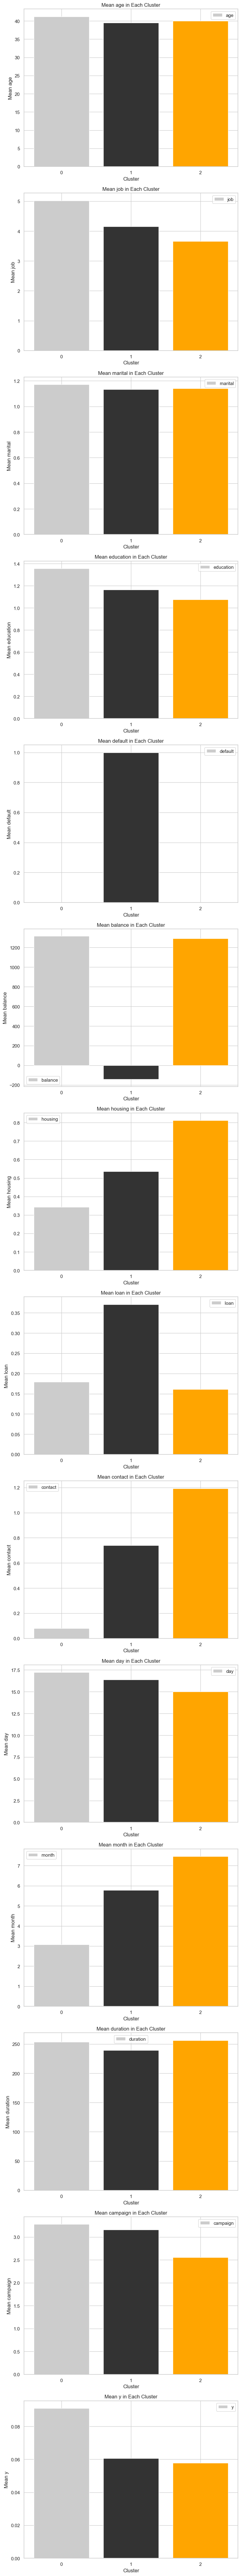

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Number of clusters
n_clusters = 3

# Get a list of all feature names except for the 'Investment_Propensity' column
features_to_analyze = cluster_means.columns.drop('Investment_Propensity').tolist()

# Create subplots for each feature
fig, axs = plt.subplots(len(features_to_analyze), 1, figsize=(8, 6 * len(features_to_analyze)))

# Define cluster labels (0, 1, 2)
cluster_labels = np.arange(n_clusters)

# Define a custom color palette with light gray, dark gray, orange, and violet
cluster_colors = ['#CCCCCC', '#333333', '#FFA500', '#8A2BE2']  # Hex color codes

# Iterate through each feature
for i, feature in enumerate(features_to_analyze):
    # Create a bar plot for each cluster's mean value of the feature with custom colors
    ax = axs[i]
    cluster_values = cluster_means[feature].values
    ax.bar(cluster_labels, cluster_values, tick_label=cluster_labels, color=cluster_colors, label=feature)
    
    # Set labels and title for the subplot
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Mean ' + feature)
    ax.set_title('Mean ' + feature + ' in Each Cluster')
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
